# eda008

In [1]:
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("darkgrid")
%matplotlib inline

## データセットの読み込み

In [2]:
input_path = Path("../input")

train_df = pd.read_parquet(input_path / "train.parquet")
test_df = pd.read_parquet(input_path / "test.parquet")

## EDA

datetime(日時)：日付 + 時間(1時間ごとに1data)\
season(季節)：1 = 春, 2 = 夏, 3 = 秋, 4 = 冬\
holiday(祝日)：0 = 祝日ではない, 1 = 祝日\
workingday(労働日)：0 = 休日または休暇, 1 = 労働日\
weather(天気)：\
1: 快晴, 雲が少ない, 部分的に曇り, 部分的に曇り\
2：霧＋曇り、霧＋雲切れ、霧＋雲少、霧\
3: 小雪、小雨+雷雨+雲が散らばる、小雨+雲が散らばる\
4：大雨＋氷霰＋雷雨＋霧、雪＋霧\
temp(気温)：摂氏温度\
atemp(体感気温)：摂氏の感じる温度\
humidity(湿度)：相対湿度\
windspeed(風速)：風速\
casual(非登録ユーザーの利用数)：非登録ユーザーの利用数\
registered(登録ユーザーの利用数)：登録ユーザーの利用数\
count(総利用数)：総利用数


In [3]:
datetime = pd.to_datetime(train_df["datetime"])

train_df["year"] = datetime.dt.year
train_df["month"] = datetime.dt.month
train_df["day"] = datetime.dt.day
train_df["hour"] = datetime.dt.hour
train_df["dayofweek"] = datetime.dt.day_name()

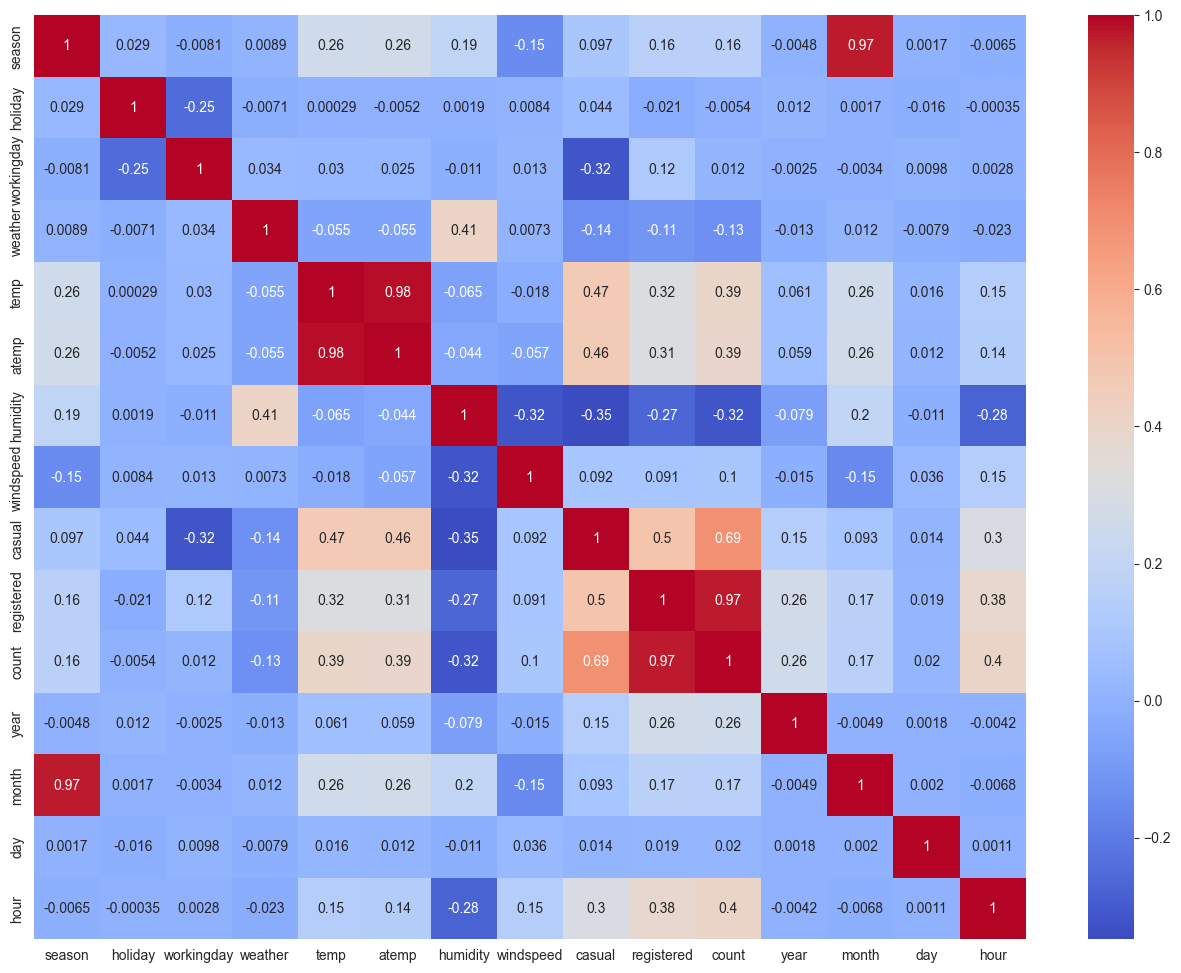

In [4]:
figure = plt.figure(figsize=(16, 12))
numeric_train_df = train_df.select_dtypes(include=[np.number])
sns.heatmap(numeric_train_df.corr(), annot=True, cmap="coolwarm")
plt.show()

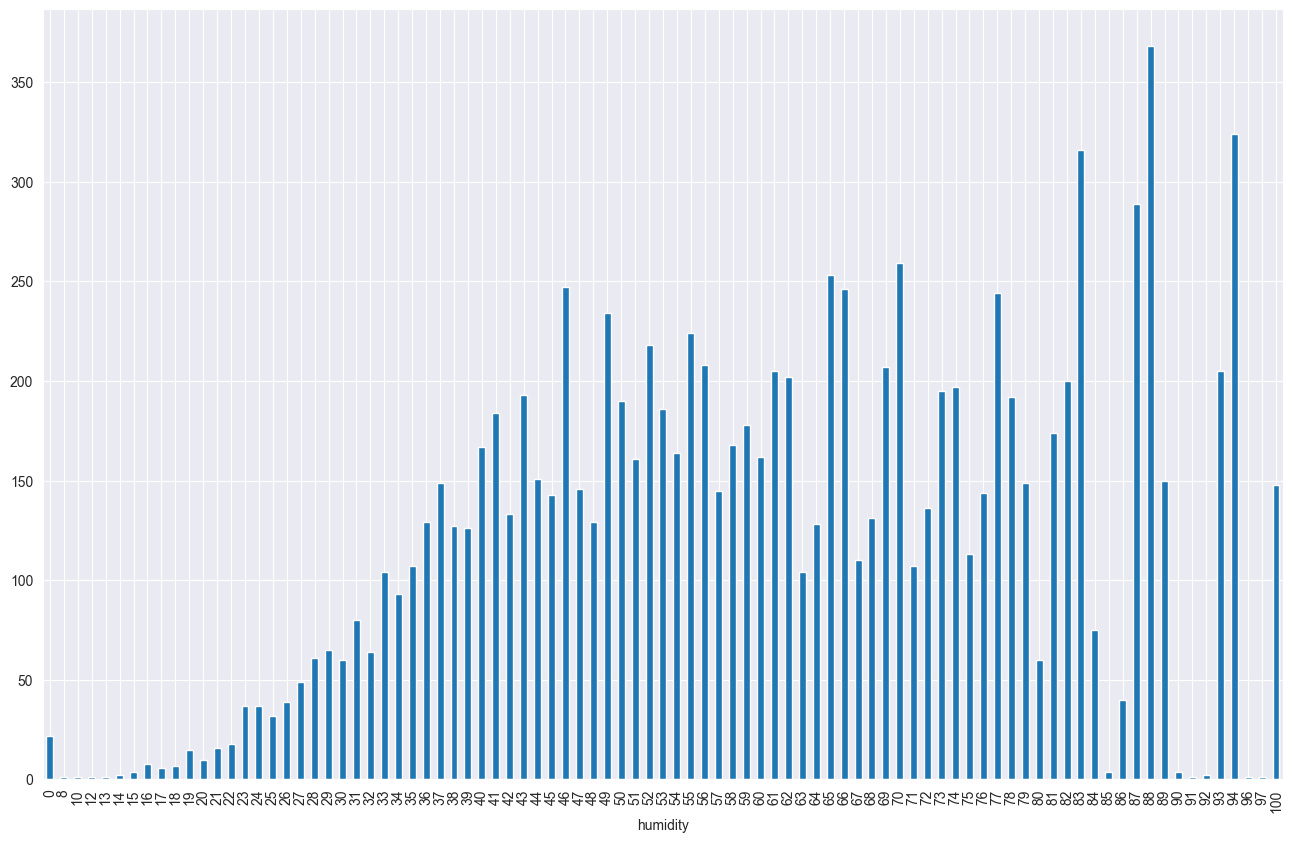

In [43]:
fig = plt.figure(figsize=(16, 10))
train_df["humidity"].value_counts().sort_index().plot.bar()
plt.show()

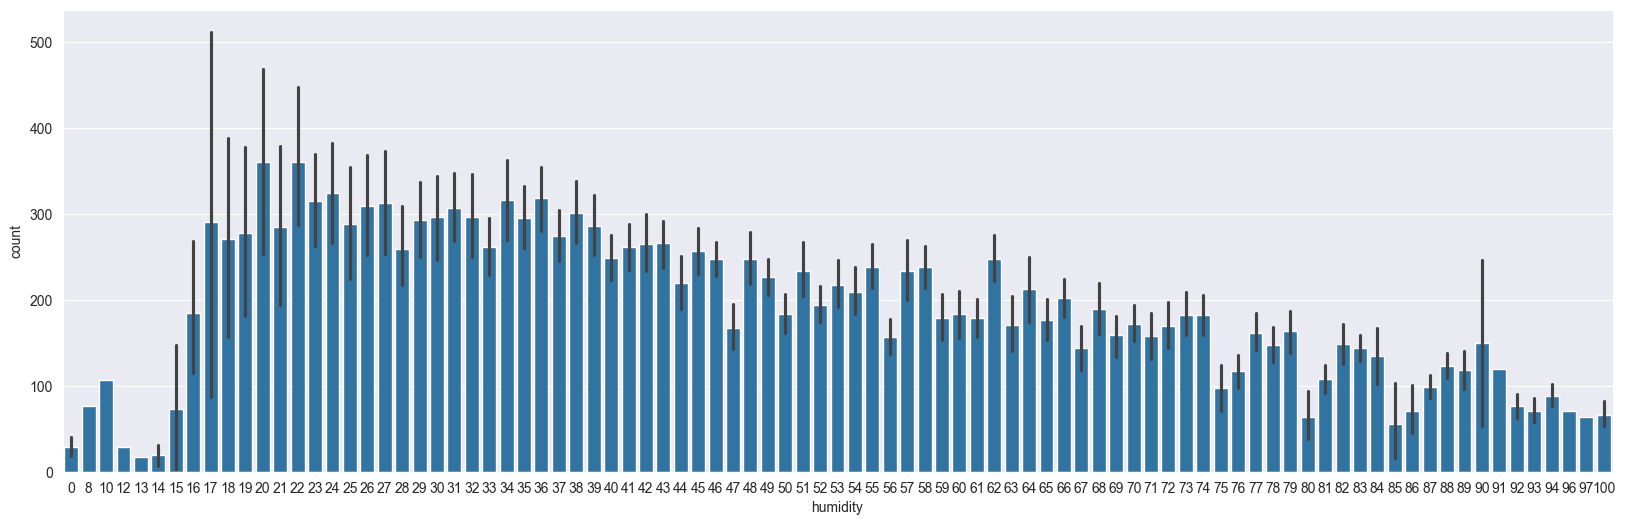

In [28]:
fig = plt.figure(figsize=(20, 6))
sns.barplot(x="humidity", y="count", data=train_df)
plt.show()

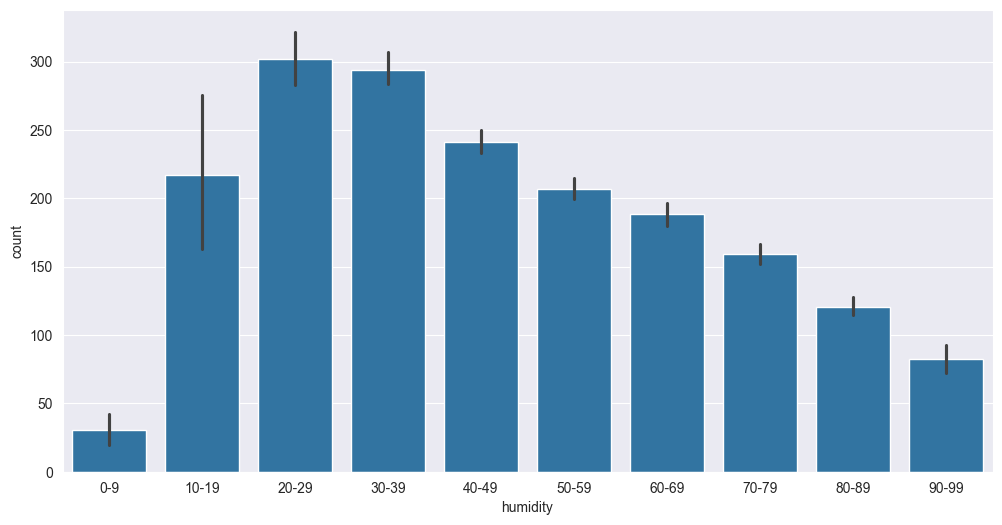

In [37]:
bins = list(range(0, 101, 10))
labels = [f"{i}-{i+9}" for i in range(0, 100, 10)]
humidity_bin = pd.cut(train_df["humidity"], bins=bins, labels=labels, right=False)

fig = plt.figure(figsize=(12, 6))
sns.barplot(x=humidity_bin, y="count", data=train_df, estimator=np.mean)
plt.show()

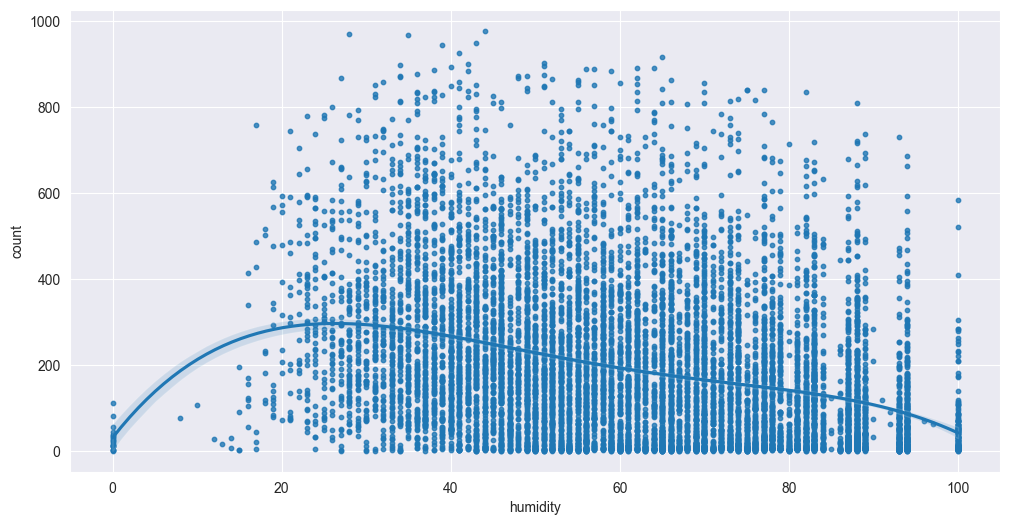

In [39]:
plt.figure(figsize=(12, 6))
sns.regplot(x="humidity", y="count", data=train_df, scatter_kws={'s':10}, order=4)
plt.show()

湿度が20~40のとき利用者が多い傾向にある\
それ以上は右肩下がりの傾向